In [1]:
# LINEAR REGRESSION | DEGREE 1 | VARIABLE 1

In [2]:
# importing necessary libraries and converting to suitable format
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
file = pd.read_csv("linear_dataset.csv", header=None)

In [4]:
# reading and converting to suitable format
file = file.to_numpy()
dimensions = np.shape(file)[1] - 1
n = np.shape(file)[0]
X = file[:, 0:dimensions]
Y = np.reshape(file[:, dimensions], (n, 1))

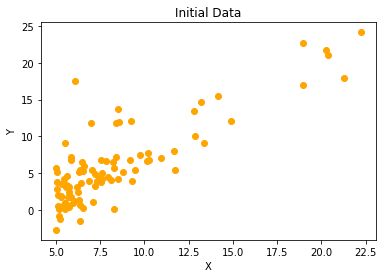

In [5]:
# Plotting
plt.scatter(X, Y, color='orange')
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Initial Data")
plt.show()

In [6]:
# parameters initialization
t = np.transpose(np.random.rand(1, dimensions + 1))

In [7]:
def stick_column_with_one(X):
    n = np.shape(X)[0]
    ones = np.ones((n, 1))
    return np.hstack((ones, X))

In [8]:
# The gradient descent function for linear equations
def gradient_descent(X, Y, theta, learning_rate, num_iters):
    n = np.shape(X)[0]
    calc_x = stick_column_with_one(X)
    for i in range(num_iters):
        # calculate the current prediction
        prediction = np.matmul(calc_x, theta)
        # obtain the error
        error_vector = Y - prediction
        # Update the thetas. Here I've vectorized the operation of updating thetas
        theta = theta + (learning_rate)/(n) * np.matmul(np.transpose(calc_x), error_vector)   
    return theta

In [9]:
thetas = gradient_descent(X, Y, t, 0.01, 3000) # learning rate = 0.01, num_iters = 3000

In [10]:
# The prediction function. It predicts Y from respective X and thetas
def predict(X, thetas):
    """X is a nxd dimensional array and theta is a dx1 dimensional"""
    n = np.shape(X)[0]
    ones = np.ones((n, 1))
    return np.matmul(np.hstack((ones, X)), thetas)

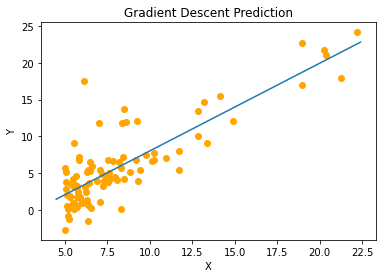

In [11]:
#Prepare to plot the prediction line
rows_xs = np.arange(4.5, 22.5, 0.1)
xs = np.linspace(rows_xs, rows_xs, 1)
xs = np.transpose(xs)
ys = predict(xs, thetas)

plt.plot(xs, ys)
plt.scatter(X, Y, color="orange")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gradient Descent Prediction")
plt.show()

In [12]:
# ====================NORMAL EQUATIONS=====================

In [13]:
# Normal equation function. It returns suitable value for theta
def normal_equations(X, Y, theta):
    """Given X, Y and thetas, calculates optimal values of thetas"""
    calc_x = stick_column_with_one(X)
    X_T = np.transpose(calc_x)
    intermediate = np.linalg.pinv(np.matmul(X_T, calc_x))
    return np.matmul(np.matmul(intermediate, X_T), Y)

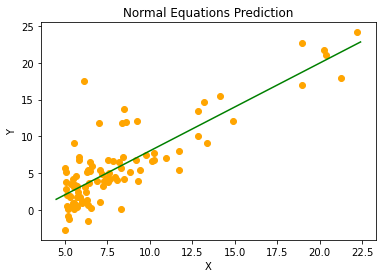

In [14]:
#Plotting the prediction curve
theta2 = normal_equations(X, Y, t)
ys2 = predict(xs, theta2)
plt.plot(xs, ys2, color="green")
plt.scatter(X, Y, color="orange")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Normal Equations Prediction")
plt.show()